Impor Library dan Baca Dataset:

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset
dataset = pd.read_csv('IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values




Pembagian Data:

In [ ]:
# Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.discriminant_analysis import StandardScaler

# Inisialisasi dan sesuaikan skala
scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))
scaler.fit(y_train.reshape(-1, 1))

# Skala data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))


Pelatihan Model:

- Dalam tugas regresi seperti memprediksi pendapatan berdasarkan suhu, akurasi bukanlah metrik yang cocok karena akurasi biasanya digunakan dalam tugas klasifikasi di mana tujuannya adalah mengklasifikasikan input dengan benar ke dalam kategori diskrit. Dalam regresi, tujuannya adalah untuk memprediksi nilai kontinu

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError

# Inisialisasi model
MesinModel = Sequential()
MesinModel.add(Dense(64, activation='relu', input_shape=(1,)))
MesinModel.add(Dense(64, activation='relu'))
MesinModel.add(Dense(1))  # Output layer tanpa fungsi aktivasi untuk regresi

# Kompilasi model
MesinModel.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Pelatihan model
MesinModel.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 290242.6562 - mean_squared_error: 290242.6562
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 257918.7031 - mean_squared_error: 257918.7031
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 187135.4062 - mean_squared_error: 187135.4062
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 82545.1719 - mean_squared_error: 82545.1797
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 11798.3291 - mean_squared_error: 11798.3291
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 825.0467 - mean_squared_error: 825.0467
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 740.3494 - mean_squared_error: 740.3494
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 735.5966 - mean_squared_error: 735.5966
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - los

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluasi kinerja MesinModel
y_pred = MesinModel.predict(X_test)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


4/4 [==============================] - 0s 2ms/step
Mean Absolute Error: 19.18818356885576
Mean Squared Error: 653.2737205053053
Root Mean Squared Error: 25.55921987278378


4/4 [==============================] - 0s 2ms/step


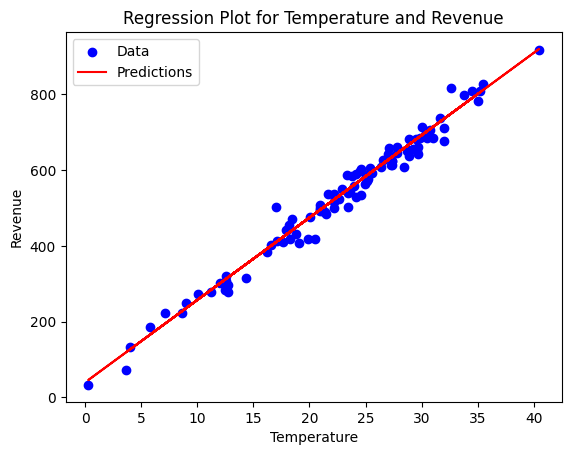

In [33]:

# Evaluasi kinerja model
y_pred = MesinModel.predict(X_test)

import matplotlib.pyplot as plt

# Plot the scatter plot with the original unscaled data
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Predictions')
plt.title('Regression Plot for Temperature and Revenue')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend()
plt.show()
